# TensorFlow Feed-Forward Neural Network
## Dataset: Did it Rain in Seattle? (1948-2017)

Kaggle Dataset Web Link:

https://www.kaggle.com/datasets/rtatman/did-it-rain-in-seattle-19482017


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
import matplotlib.pyplot as plt

2024-03-23 18:51:43.209853: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-23 18:51:43.212388: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-23 18:51:43.249140: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-23 18:51:43.984279: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Hyperparameters

In [2]:
# Hyperparameters
input_shape = (4,)       # Sets the number of input parameters in the input layer
input_units = 7          # Sets the number of output parameters in the input layer
hidden_units_1 = 7       # Sets the number of input parameters in hidden layer 1
hidden_units_2 = 7       # Sets the number of input parameters in hidden layer 2
output_units = 1         # Sets the number of parameters at the output layer
lr = 1e-3                # Sets the leanring rate
epochs = 60              # Sets the number of training epochs
batch_size = 32          # Sets the batch size
# -----------------

# Load the Data to the Jupyter Notebook

In [3]:
# Read in the CSV data to the script with the Pandas library
X_train_in = pd.read_csv('./dataset/X_train.csv')
y_train_in = pd.read_csv('./dataset/y_train.csv')
X_test = pd.read_csv('./dataset/X_test.csv')
y_test = pd.read_csv('./dataset/y_test.csv')

In [4]:
# Split the training and validation data with ScikitLearn
X_train, X_val, y_train, y_val = train_test_split(X_train_in, y_train_in, test_size=0.2, stratify=y_train_in, random_state=42)

# Prints out the X_train Pandas DataFrame to the screen
X_train

,DATE,PRCP,TMAX,TMIN
15303,-0.572820,-0.381966,-0.378219,-0.260914
7199,-0.259383,2.210652,0.743952,1.232160
6363,1.714217,-0.503495,2.587519,2.840086
1380,0.638299,-0.503495,-0.378219,0.083642
14037,1.047148,0.347208,-1.019460,-0.720321
...,...,...,...,...
6093,-1.208492,-0.503495,1.064572,1.117308
21589,0.559533,0.100579,-1.340080,-1.294580
15688,-1.225544,0.306698,-0.538530,-0.031210
2707,1.640188,-0.462985,-0.698840,-1.064877


In [5]:
# Prints out the X_val Pandas DataFrame to the screen
X_val

,DATE,PRCP,TMAX,TMIN
11504,1.011960,-0.503495,0.102711,-0.835173
10831,1.451936,-0.422476,-0.137754,-0.260914
12442,-0.781779,-0.503495,-1.340080,-1.753988
6050,1.365728,-0.503495,1.705813,1.461864
9427,1.226738,-0.503495,0.182866,0.657901
...,...,...,...,...
21301,-1.391195,-0.503495,0.263021,-0.031210
3349,-1.243814,-0.179418,0.423331,1.117308
263,-1.661054,-0.503495,-0.458375,0.083642
6280,-0.494596,-0.503495,-0.778995,-0.375766


In [6]:
# Prints out the X_test Pandas DataFrame to the screen
X_test

,DATE,PRCP,TMAX,TMIN
0,-0.047041,-0.503495,-1.340080,-1.409432
1,-0.579181,-0.503495,-1.179770,-1.064877
2,1.313353,-0.503495,1.064572,0.887604
3,-1.414608,-0.503495,-0.298064,-0.490618
4,-1.409871,-0.503495,1.305037,0.198493
...,...,...,...,...
5855,0.229856,-0.503495,1.705813,1.347012
5856,0.619487,-0.503495,1.465347,0.772753
5857,1.506477,-0.503495,0.663797,0.543049
5858,1.078410,-0.503495,0.343176,0.313345


In [7]:
# Prints out the y_train Pandas DataFrame to the screen
y_train

,RAIN
15303,1
7199,1
6363,0
1380,0
14037,1
...,...
6093,0
21589,1
15688,1
2707,1


In [8]:
# Prints out the y_val Pandas DataFrame to the screen
y_val

,RAIN
11504,0
10831,1
12442,0
6050,0
9427,0
...,...
21301,0
3349,1
263,0
6280,0


In [9]:
# Prints out the y_test Pandas DataFrame to the screen
y_test

,RAIN
0,0
1,0
2,0
3,0
4,0
...,...
5855,0
5856,0
5857,0
5858,0


# Initialise the Deep Neural Network Model

In [10]:
# Build the Feed Forward Neural Network (FNN) model using the Keras sequential API
model = Sequential([
    
    # Input layer
    Dense(units=input_units, input_shape=input_shape, activation='relu'),
    
    # Hidden layer 1
    Dense(units=hidden_units_1, activation='relu'),
    
    # Hidden layer 2
    Dense(units=hidden_units_2, activation='relu'),
    
    # Output layer
    Dense(units=output_units, activation='sigmoid')
  ])

/home/steve/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-03-23 18:51:45.924358: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-23 18:51:45.924792: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the req

# Model Summary

In [11]:
# Prints out the summary of the neural network architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            35 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 155 (620.00 B)

 Trainable params: 155 (620.00 B)

 Non-trainable params: 0 (0.00 B)

# Compile the Model

In [12]:
# Compiles the TensorFlow Keras Neural Network classifier with the AdamW optimiser
model.compile(optimizer=AdamW(learning_rate=lr,
                                beta_1=0.9,
                                beta_2=0.999,
                                epsilon=1e-07),
                                loss ="binary_crossentropy", 
                                metrics=["accuracy"])

# Train the Deep Neural Network Model

In [13]:
# Sets the random seed to repeat any randomness
tf.random.set_seed(1234)

# Initialise early stopping to the validation loss
callback = EarlyStopping(monitor='val_loss', patience=3)

# Fits the data to the TensorFlow Keras Neural Network classifier model
history = model.fit(X_train, y_train, 
                     epochs=epochs, 
                     batch_size=batch_size,
                     validation_data=(X_val, y_val),
                     callbacks=[callback]
)

Epoch 1/60
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - accuracy: 0.7033 - loss: 0.5373 - val_accuracy: 0.8965 - val_loss: 0.2433
Epoch 2/60
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.9098 - loss: 0.2218 - val_accuracy: 0.9326 - val_loss: 0.1700
Epoch 3/60
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.9422 - loss: 0.1516 - val_accuracy: 0.9646 - val_loss: 0.1048
Epoch 4/60
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.9696 - loss: 0.0913 - val_accuracy: 0.9868 - val_loss: 0.0608
Epoch 5/60
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.9822 - loss: 0.0551 - val_accuracy: 0.9940 - val_loss: 0.0371
Epoch 6/60
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.9922 - loss: 0.0347 - val_accuracy: 0.9987 - val_loss: 0.0225
Epoch 7/60
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.9969 - loss: 0.0214 - val_accuracy: 1.0000 - val_loss: 0.0132
Epoch 8/60
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.9995 - loss: 0.0128 - 

Epoch 49/60
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 1.0000 - loss: 9.1942e-09 - val_accuracy: 1.0000 - val_loss: 8.0635e-09
Epoch 50/60
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 1.0000 - loss: 8.5282e-09 - val_accuracy: 1.0000 - val_loss: 5.9573e-09
Epoch 51/60
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 1.0000 - loss: 7.5726e-09 - val_accuracy: 1.0000 - val_loss: 4.8460e-09
Epoch 52/60
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 1.0000 - loss: 6.1490e-09 - val_accuracy: 1.0000 - val_loss: 4.1508e-09
Epoch 53/60
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.9999 - loss: 4.9990e-04 - val_accuracy: 0.9902 - val_loss: 0.0214
Epoch 54/60
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.9991 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 2.6570e-06
Epoch 55/60
586/586 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 1.0000 - loss: 2.1397e-06 - val_accuracy: 1.0000 - val_loss: 1.3962e-06


# Training and Validation Loss

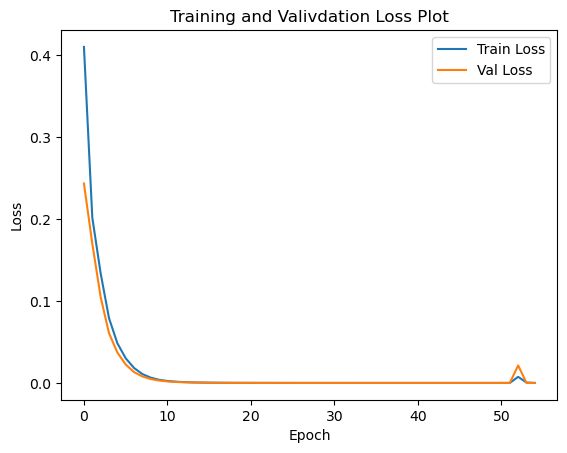

In [14]:
# Stores the training and validation loss from training
loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Conts the number of training epochs run during training
epochs = range(len(history.history["loss"]))

# Plots the training and validation loss
plt.plot(epochs, loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Val Loss")
plt.title("Training and Valivdation Loss Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Training and Validation Accuracy

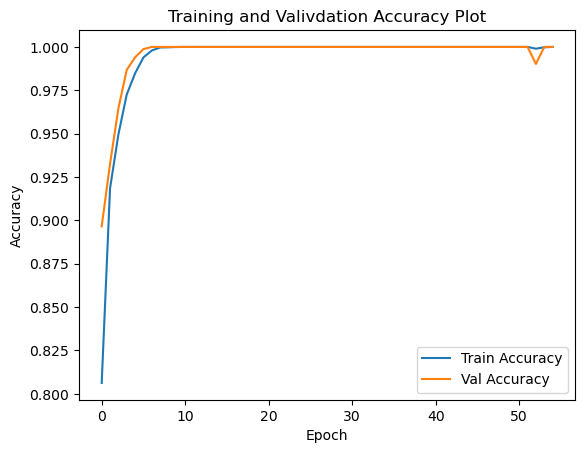

In [15]:
# Stores the training and validation accuracy from training
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

# Plots the training and validation accuracy
plt.plot(epochs, accuracy, label="Train Accuracy")
plt.plot(epochs, val_accuracy, label="Val Accuracy")
plt.title("Training and Valivdation Accuracy Plot")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Test Loss and Accuracy

In [16]:
# Evaluate the test dataset on the TensorFlow Keras Neural Network classifier
loss, accuracy = model.evaluate(X_test, y_test)

# Test Accuracy and loss
print("Accuracy", accuracy)
print("Loss", loss)

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 1.0000 - loss: 1.2980e-06
Accuracy 1.0
Loss 1.2711526551356656e-06


# Save the Trained Model

In [17]:
import os
import pathlib

# Checkpoint file path directory
path = './tensorflow-model/'

# File path directory to check for
file = pathlib.Path(path)

# Conditional if statement to check for the model checkpoint filep ath directory
if file.exists():
    # Prints out the file path directory exists if it does and passes the conditional
    print('File path exists: ', path)
    pass
else:
    # Outputs the folder contents to checkpoint saved models to
    os.makedirs(path)

In [18]:
# Saves the model weights as classifier.h5
model.save(path + 'classifier.h5')

# Print out all the Python Variables from the Jupyter Notebook to the Screen

In [19]:
# Prints out all the Python variables from the Jupyter Notebook to the screen
%whos

Variable                   Type               Data/Info
-------------------------------------------------------
Activation                 type               <class 'keras.src.layers.<...>s.activation.Activation'>
AdamW                      type               <class 'keras.src.optimizers.adamw.AdamW'>
Dense                      type               <class 'keras.src.layers.core.dense.Dense'>
EarlyStopping              type               <class 'keras.src.callbac<...>_stopping.EarlyStopping'>
Sequential                 type               <class 'keras.src.models.sequential.Sequential'>
X_test                     DataFrame                    DATE      PRCP <...>\n[5860 rows x 4 columns]
X_train                    DataFrame                     DATE      PRCP<...>n[18748 rows x 4 columns]
X_train_in                 DataFrame                     DATE      PRCP<...>n[23436 rows x 4 columns]
X_val                      DataFrame                     DATE      PRCP<...>\n[4688 rows x 4 columns]
ac